# Modelo Livre de Escala
## Autor: Mariano F.M.A.S.
### Data: 09/07/2023



 O Modelo de Livre de Escala, proposto por Albert-László Barabási e Réka Albert, é uma teoria fundamental na Teoria de Redes Complexas que descreve a organização de certas redes complexas. Este modelo é caracterizado por uma distribuição de grau que segue uma lei de potência, o que significa que a proporção de nós com um determinado grau é inversamente proporcional a uma potência desse grau. Isso resulta em uma rede com alguns nós altamente conectados, chamados "hubs", que têm muito mais conexões do que a maioria dos outros nós.

O modelo é baseado em dois conceitos principais: crescimento e preferência. A rede cresce continuamente com a adição de novos nós, e cada novo nó se conecta a nós existentes com uma probabilidade proporcional ao grau desses nós. Isso é conhecido como "linkagem preferencial" e é frequentemente resumido pelo adágio "os ricos ficam mais ricos". Isso resulta em uma rede que é "livre de escala", o que significa que não há uma escala típica que defina a rede.

Este modelo tem sido muito influente na teoria de redes complexas, pois fornece uma explicação simples e elegante para a estrutura de muitas redes reais. Ele tem sido usado para descrever uma variedade de redes reais, incluindo a Internet, redes sociais e redes biológicas. A presença de hubs altamente conectados em redes livres de escala tem implicações importantes para a robustez e a dinâmica dessas redes.


## Gerando a rede Livre de Escala

In [3]:
import numpy as np
import scipy
#import networkx as nx
import matplotlib.pyplot as plt
import heapq
from numba import njit
from numba import prange
import time
from scipy.stats import pearsonr



In [4]:

# Registrar o tempo de início
start_time = time.time()
m = 5 # número de conexões adicionadas para cada novo nó
n = 1000 # número de nós na rede

 
# Inicialize a matriz A como uma matriz de ordem m
A = np.zeros((m, m))

# escolha m nós iniciais
for i in range(m):
    for j in range(m):
        if i != j:
            A[i, j] = 1
            A[j, i] = 1


delta_n=(1 / n) * 100
for i in range(m, n):
    # Aumente a ordem da matriz A 
    new_A = np.zeros((i+1, i+1))
    new_A[:i, :i] = A 

    # calcule a probabilidade de conexão de cada nó existente
    probs = np.sum(new_A, axis=0, keepdims=True)
    probs /= np.sum(new_A)
    indices = np.arange(i+1)
    # escolha m nós existentes para se conectar ao novo nó
    new_conns = np.random.choice(indices, size=m, replace=False, p=probs.flatten())

    # crie as conexões entre o novo nó e os nós existentes
    new_A[i, new_conns] = 1
    new_A[new_conns, i] = 1

    A = new_A
    #Progresso 
    progress = i* delta_n
    if progress % 10 == 0:
        print(f"{progress:.0f}%")

# Registrar o tempo de término
end_time = time.time() 
execution_time = end_time - start_time 
print(f"Tempo de execução: {execution_time:.2f} segundos")

# Salve a matriz A em um arquivo de texto
np.savetxt('matrix_A.txt', A )





10%
20%
30%
40%
50%
60%
70%
80%
90%
Tempo de execução: 1.16 segundos


# Distribuição de Grau 
Uma característica notável das distribuições de lei de potência é que elas têm uma cauda longa. Isso significa que, embora a maioria dos nós tenha um grau relativamente baixo, há alguns nós (os "hubs") que têm um grau muito alto. Esses nós altamente conectados são uma característica marcante das redes livres de escala.

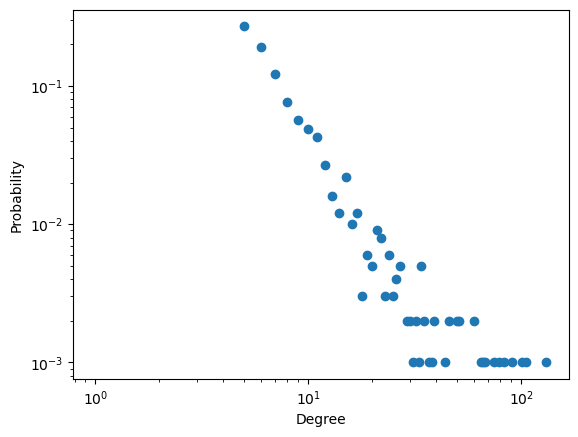

In [5]:

# Calcular o grau de cada nó
@njit
def degree_centrality(A):
    return np.sum(A, axis=0)

# Obter a distribuição de grau
degrees = degree_centrality(A)
counts, edges = np.histogram(degrees, bins=np.arange(np.max(degrees)+2), density=True)

# Plotar a distribuição de grau em uma escala log-log
plt.loglog(edges[:-1], counts, 'o')
plt.xlabel('Degree')
plt.ylabel('Probability')
plt.show()


In [7]:
''' 
import networkx as nx
# criar o objeto do grafo a partir da matriz de adjacência
G = nx.from_numpy_array(A)

# plotar o grafo
nx.draw(G, with_labels=True)
plt.show()
'''

' \nimport networkx as nx\n# criar o objeto do grafo a partir da matriz de adjacência\nG = nx.from_numpy_array(A)\n\n# plotar o grafo\nnx.draw(G, with_labels=True)\nplt.show()\n'

##  Coeficiente de Agrupamento Global

O coeficiente de agrupamento global, também conhecido como coeficiente de clustering, é uma medida na teoria de redes que quantifica o grau de agrupamento em uma rede. Ele é usado para entender a tendência dos nós em uma rede se agruparem juntos.

O coeficiente de agrupamento de um nó individual em uma rede é a proporção de conexões possíveis entre os vizinhos desse nó que realmente existem. Em outras palavras, se um nó tem k vizinhos, existem k(k-1)/2 pares possíveis de vizinhos, e o coeficiente de agrupamento é a proporção desses pares que estão realmente conectados.

O coeficiente de agrupamento global é a média dos coeficientes de agrupamento de todos os nós na rede. Ele fornece uma medida do grau de agrupamento em toda a rede. Um coeficiente de agrupamento global alto indica que os nós na rede tendem a se agrupar juntos, formando comunidades densamente conectadas.

In [8]:
@njit
def clustering_coefficients(A):
    n = len(A)  # número de nós na rede
    C = np.zeros(n)  # inicializa o vetor de coeficientes de agrupamento

    for i in prange(n):
        ki = np.sum(A[i])  # grau do nó i
        if ki > 1:  # o coeficiente de agrupamento é definido apenas para nós com grau > 1
            Ei = np.sum(A[i] * A @ A[i]) / 2  # número de arestas entre os vizinhos do nó i
            C[i] = 2 * Ei / (ki * (ki - 1))  # coeficiente de agrupamento do nó i

    return C

@njit
def global_clustering_coefficient(A):
    C = clustering_coefficients(A)  # coeficientes de agrupamento de todos os nós
    C_global = np.mean(C)  # coeficiente de agrupamento global
    return C_global

print(global_clustering_coefficient(A))


3.7358889958538186


**global_clustering_coefficient = 3.7358**


##  Diâmetro Da Rede

O diâmetro de uma rede é uma medida de distância na teoria de redes que representa a maior distância entre quaisquer dois nós na rede. Em outras palavras, é o maior número de arestas que devem ser atravessadas para ir de um nó a outro na rede.

A distância entre dois nós é geralmente medida pelo número de arestas no caminho mais curto entre eles, também conhecido como a "distância geodésica". O diâmetro da rede é então o maior desses caminhos mais curtos entre todos os pares de nós na rede.

O diâmetro é uma medida importante da escala de uma rede e pode dar uma indicação do tempo ou etapas necessárias para a informação se propagar através da rede.  

### Algoritmo De Floyd-Warshall 

O algoritmo de Floyd-Warshall é um algoritmo de caminho mais curto que é comumente usado para encontrar o diâmetro de uma rede. Este algoritmo é particularmente útil para calcular o diâmetro porque ele encontra o caminho mais curto entre todos os pares de nós em uma rede.

O algoritmo de Floyd-Warshall é um exemplo de um algoritmo de programação dinâmica. Ele funciona iterativamente atualizando uma matriz de distâncias para incluir cada vez mais longos caminhos entre os nós. A ideia básica é que, para cada par de nós (i, j), ele verifica se o caminho de i para j pode ser encurtado passando por um terceiro nó k. Se sim, ele atualiza a matriz de distâncias para refletir esse caminho mais curto.

O algoritmo de Floyd-Warshall tem uma complexidade de tempo de $O(n^3)$, onde $n$ é o número de nós na rede. Isso o torna impraticável para redes muito grandes. No entanto, para redes de tamanho moderado, é uma maneira eficiente de calcular o diâmetro.

In [9]:
def network_diameter_Floyd_Warshall(A):
    n = len(A)  # número de nós na rede

    # Inicializa a matriz de distâncias com valores infinitos
    D = np.full((n, n), np.inf)

    # A distância de cada nó para si mesmo é 0
    np.fill_diagonal(D, 0)

    # A distância entre nós conectados é 1
    D[A == 1] = 1

    # Aplica o algoritmo de Floyd-Warshall para calcular a matriz de distâncias
    for k in range(n):
        for i in range(n):
            for j in range(n):
                D[i, j] = min(D[i, j], D[i, k] + D[k, j])

    # O diâmetro da rede é o máximo valor na matriz de distâncias
    diameter = np.max(D)

    return diameter


In [ ]:
#network_diameter_Floyd_Warshall(A)

### Algoritmo de busca em largura (BFS)
O algoritmo BFS pode ser adaptado para calcular o diâmetro de uma rede complexa. Começando de um nó inicial, o algoritmo BFS explora a rede em camadas, visitando todos os nós alcançáveis em cada camada. O diâmetro pode ser determinado pelo maior número de camadas percorridas antes de visitar todos os nós da rede. O algoritmo BFS tem uma complexidade assintótica de O(n + m), onde n é o número de nós e m é o número de arestas da rede.

In [10]:
from collections import deque

def calcular_diametro_bfs(matriz_adjacencia):
    n = len(matriz_adjacencia)
    diametro = 0

    for i in range(n):
        distancia = bfs(matriz_adjacencia, i)
        max_distancia = max(distancia)
        diametro = max(diametro, max_distancia)

    return diametro

def bfs(matriz_adjacencia, origem):
    n = len(matriz_adjacencia)
    visitados = [False] * n
    distancia = [0] * n

    queue = deque()
    queue.append(origem)
    visitados[origem] = True

    while queue:
        atual = queue.popleft()

        for vizinho in range(n):
            if matriz_adjacencia[atual][vizinho] == 1 and not visitados[vizinho]:
                queue.append(vizinho)
                visitados[vizinho] = True
                distancia[vizinho] = distancia[atual] + 1

    return distancia

print(calcular_diametro_bfs(A))

5


### Algoritmo De Dijkstra

O algoritmo de Dijkstra é um algoritmo de caminho mais curto que é usado para encontrar o caminho mais curto entre um nó de origem e todos os outros nós em uma rede. No entanto, ele não é normalmente usado para calcular o diâmetro de uma rede diretamente, porque o diâmetro é definido como o maior caminho mais curto entre quaisquer dois nós na rede, não apenas a partir de um nó de origem.

No entanto, é possível usar o algoritmo de Dijkstra para calcular o diâmetro de uma rede executando o algoritmo a partir de cada nó na rede e mantendo o controle do maior caminho mais curto encontrado. Isso seria computacionalmente caro, pois o algoritmo de Dijkstra tem uma complexidade de tempo de $O(n^2)$ para uma implementação simples ou $O((n+m) log (n))$ para uma implementação usando uma heap binária, onde $n$ é o número de nós e $m$ é o número de arestas.

In [11]:

def dijkstra(A, start):
    n = len(A)
    dist = np.full(n, np.inf)
    dist[start] = 0
    queue = [(0, start)]

    while queue:
        d, u = heapq.heappop(queue)
        if d != dist[u]:
            continue
        for v in prange(n):
            if A[u, v] != 0 and dist[u] + A[u, v] < dist[v]:
                dist[v] = dist[u] + A[u, v]
                heapq.heappush(queue, (dist[v], v))

    return dist


def network_diameter_dijkstra(A):
    n = len(A)
    max_dist = 0
    for i in prange(n):
        dist = dijkstra(A, i)
        max_dist = max(max_dist, max(dist[dist != np.inf]))
    return max_dist

print(network_diameter_dijkstra(A))

5.0


**network_diameter_dijkstra=5.0**

## Coeficiente De Correlação de Pearson

O coeficiente de correlação de Pearson é uma medida estatística que descreve o grau de correlação linear entre duas variáveis. Ele varia de -1 a 1, onde 1 indica uma correlação positiva perfeita, -1 indica uma correlação negativa perfeita, e 0 indica nenhuma correlação.

A correlação positiva significa que, à medida que uma variável aumenta, a outra também aumenta, enquanto a correlação negativa significa que, à medida que uma variável aumenta, a outra diminui. Se o coeficiente de correlação de Pearson for 0, isso indica que não há relação linear entre as duas variáveis.

É importante notar que o coeficiente de correlação de Pearson só mede relações lineares. Portanto, se as duas variáveis estão relacionadas de uma maneira não linear, o coeficiente de correlação de Pearson pode não ser uma medida adequada da força e direção dessa relação.

In [12]:
 

def betweenness_centrality(A):
    n = len(A)
    BC = np.zeros(n)
    for i in range(n):
        for j in range(i+1, n):
            shortest_paths = list(nx.all_shortest_paths(G, i, j))
            for k in range(n):
                if k == i or k == j:
                    continue
                paths_through_k = [path for path in shortest_paths if k in path]
                BC[k] += len(paths_through_k) / len(shortest_paths)
    return BC
def network_correlation(A):
    degree = np.sum(A, axis=0)
    betweenness = betweenness_centrality(A)
    correlation, _ = pearsonr(degree, betweenness)
    return correlation


In [13]:
network_correlation(A)

0.9480873596320393

**Coeficiente De Correlação de Pearson = 0.9481**